In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize

from stardist import random_label_cmap, _draw_polygons
from stardist.models import StarDist2D

np.random.seed(6)
lbl_cmap = random_label_cmap()

# Data

We now load images from the sub-folder `test` that have not been used during training.

In [ ]:
X_xy = sorted(glob('../*.tif'))
X_xy = list(map(imread,X_xy))

# Load trained model


In [54]:
model = StarDist2D(None, name='LIB100_70nm', basedir='models')

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


## Prediction

Make sure to normalize the input image beforehand or supply a `normalizer` to the prediction function.

Calling `model.predict_instances` will
- predict object probabilities and star-convex polygon distances (see `model.predict` if you want those)
- perform non-maximum suppression (with overlap threshold `nms_thresh`) for polygons above object probability threshold `prob_thresh`.
- render all remaining polygon instances in a label image
- return the label instances image and also the details (coordinates, etc.) of all remaining polygons

In [ ]:
if True:
    fig, ax = plt.subplots(2,2, figsize=(16,16))
    for i,(a,x) in enumerate(zip(ax.flat, X_xy)):
        
        index= np.random.randint(1, len(X_xy))
        
        print('predicting '+ str(index) + 'th image')
        img = normalize(X_xy[index], 1,99.8, axis=axis_norm)
        labels, details = model.predict_instances(img)
        a.imshow(img if img.ndim==2 else img[...,:3], clim=(0,1), cmap='gray')
        a.imshow(labels, cmap=lbl_cmap, alpha=0.5)
        a.set_title(index)
    [a.axis('off') for a in ax.flat]
    plt.tight_layout()
None;

In [62]:
axis_norm = (0,1)
def example(model,path, X, i, show_dist=True):
    img = normalize(X_xy[i], 1,99.8, axis=axis_norm)
    print(img.ndim)
    
    labels, details = model.predict_instances(img)

    ax = plt.figure(figsize=(13,10))
    img_show = img if img.ndim==2 else img[...,:3]
    coord, points, prob = details['coord'], details['points'], details['prob']
    plt.subplot(121); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    a = plt.axis()
    _draw_polygons(coord, points, prob, grid=model.config.grid, show_dist=show_dist)
    plt.axis(a)
    plt.subplot(122); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
    plt.tight_layout()
    plt.show()
    ax.savefig(path+"/slice_"+ format(i, '05')+".tif")

2


/anaconda3/envs/LIBNet/lib/python3.7/site-packages/stardist/plot/plot.py:47: UserWarning: parameter 'grid' has no effect anymore, please remove
  warn("parameter 'grid' has no effect anymore, please remove")


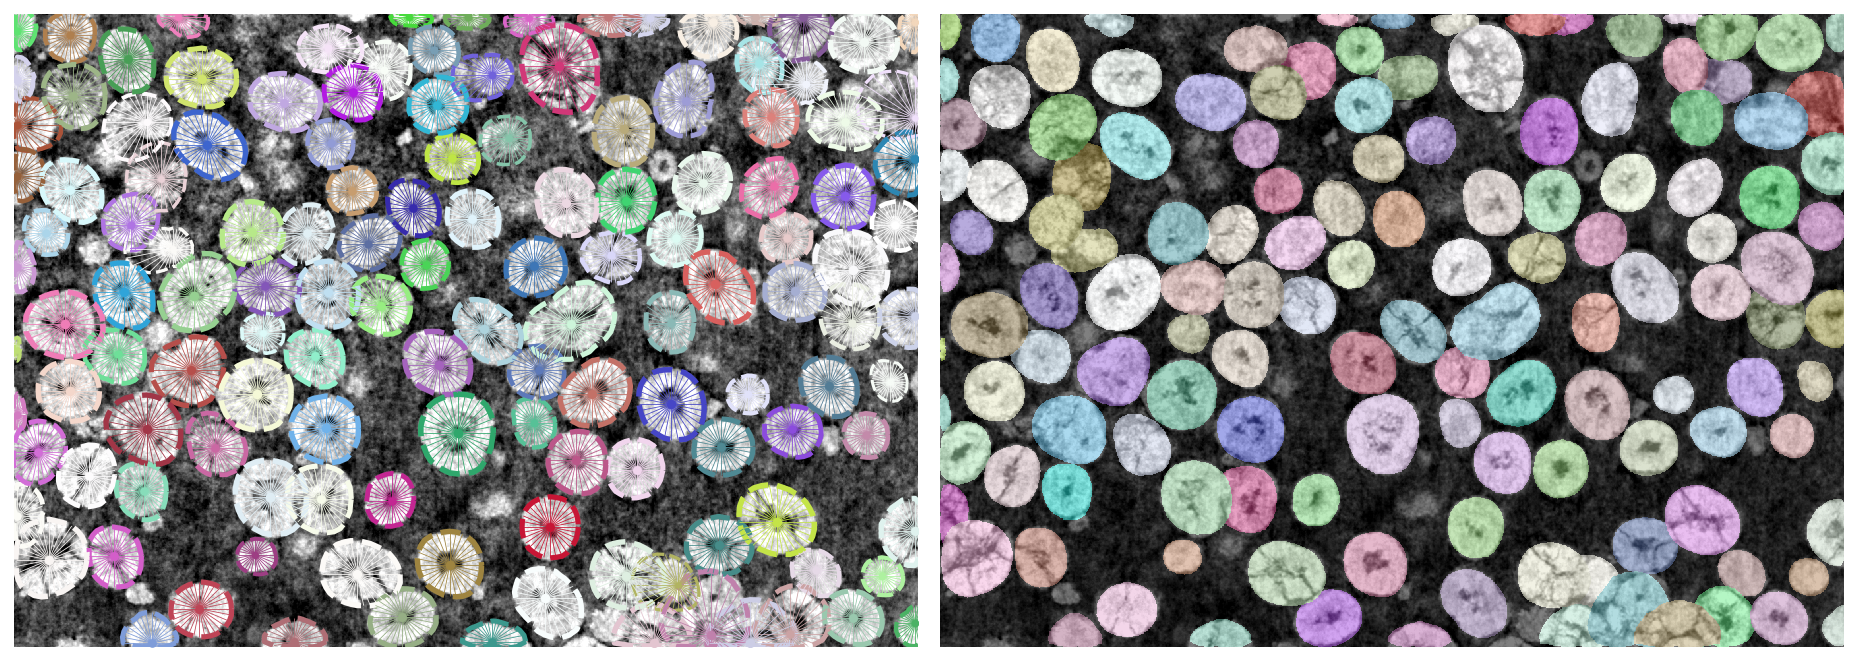

In [64]:
example(model,'RT_Results', X_xy, 100)